In [52]:
import pandas as pd
import pm4py
from pm4py.objects.conversion.log.versions import to_dataframe
import warnings
warnings.filterwarnings('ignore')

In [53]:
from pm4py.objects.log.importer import xes

In [54]:
from pm4py.objects.log.importer.xes import importer as xes_importer

### Таблицы

In [55]:
domestic_declarations = xes_importer.apply(
    'C:\PM contest\Common challenge\DomesticDeclarations.xes_\DomesticDeclarations.xes')

In [56]:
int_declarations = xes_importer.apply(
    'C:\PM contest\Common challenge\InternationalDeclarations.xes_\InternationalDeclarations.xes')

In [57]:
permit_log = xes_importer.apply(
    'C:\PM contest\Common challenge\PermitLog.xes_\PermitLog.xes')

In [58]:
prepaid_travel_cost = xes_importer.apply(
    'C:\PM contest\Common challenge\PrepaidTravelCost.xes_\PrepaidTravelCost.xes')

In [59]:
request_for_payment = xes_importer.apply(
    'C:\PM contest\Common challenge\RequestForPayment.xes_\RequestForPayment.xes')

In [60]:
domestic_declarations = to_dataframe.apply(domestic_declarations)
int_declarations = to_dataframe.apply(int_declarations)
permit_log = to_dataframe.apply(permit_log)
prepaid_travel_cost = to_dataframe.apply(prepaid_travel_cost)
request_for_payment = to_dataframe.apply(request_for_payment)

In [61]:
permit_log = pd.read_csv('C://PM contest//Common challenge//PermitLog.xes_//compact_PermitLog.csv')

In [62]:
import os
#import graphviz

## timestamp with timezone --> seconds

In [63]:
domestic_declarations['year'] = domestic_declarations['time:timestamp'].map(lambda x: x.year)

In [64]:
# "отвратный метод, простите меня"

In [65]:
domestic_declarations['timezone'] = domestic_declarations['time:timestamp'].map(lambda x: str(x.tzinfo))

In [66]:
domestic_declarations['timezone'].value_counts()

UTC+02:00    32761
UTC+01:00    23676
Name: timezone, dtype: int64

In [67]:
domestic_declarations.head()

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount,year,timezone
0,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:49:50+01:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205,2017,UTC+01:00
1,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 11:27:48+01:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205,2017,UTC+01:00
2,dd_declaration 86791_19,SYSTEM,Request Payment,2017-01-10 09:34:44+01:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205,2017,UTC+01:00
3,dd_declaration 86791_20,SYSTEM,Payment Handled,2017-01-12 17:31:22+01:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205,2017,UTC+01:00
4,st_step 86798_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 10:26:14+01:00,EMPLOYEE,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172,2017,UTC+01:00


In [68]:
from datetime import datetime, timezone
def time_format(dt):
    return dt.replace(tzinfo=None).timestamp()

In [69]:
# теперь перед нами время в секундах от начала эпохи, потом его можно конвертнуть будет в даты 
domestic_declarations['time'] = domestic_declarations['time:timestamp'].map(lambda x: time_format(x))

In [70]:
from datetime import datetime

In [71]:
domestic_declarations_1 = domestic_declarations[domestic_declarations['timezone']=='UTC+01:00']
domestic_declarations_2 = domestic_declarations[domestic_declarations['timezone']!='UTC+01:00']

domestic_declarations_1['time'] = domestic_declarations_1['time'].map(lambda x: x+3600)
domestic_declarations['time'] = domestic_declarations_2['time'].map(lambda x: x+7200)

domestic_declarations= pd.concat([domestic_declarations_1,domestic_declarations_2])

In [72]:
domestic_declarations['time'] = domestic_declarations['time'].map(lambda x: datetime.fromtimestamp(x))

In [73]:
# теперь перед нами время в секундах от начала эпохи, потом его можно конвертнуть будет в даты 
int_declarations['time'] = int_declarations['time:timestamp'].map(lambda x: time_format(x))
int_declarations['timezone'] = int_declarations['time:timestamp'].map(lambda x: str(x.tzinfo))
int_declarations_1 = int_declarations[int_declarations['timezone']=='UTC+01:00']
int_declarations_2 = int_declarations[int_declarations['timezone']!='UTC+01:00']

int_declarations_1['time'] = int_declarations_1['time'].map(lambda x: x+3600)
int_declarations_2['time'] = int_declarations_2['time'].map(lambda x: x+7200)

int_declarations= pd.concat([int_declarations_1,int_declarations_2])

In [74]:
int_declarations['time'] = int_declarations['time'].map(lambda x:datetime.fromtimestamp(x))

In [75]:
permit_log['time:timestamp']=pd.to_datetime(permit_log['time:timestamp'])

In [76]:
# теперь перед нами время в секундах от начала эпохи, потом его можно конвертнуть будет в даты 
permit_log['time'] = permit_log['time:timestamp'].map(lambda x: time_format(x))
permit_log['timezone'] = permit_log['time:timestamp'].map(lambda x: str(x.tzinfo))
permit_log_1 = permit_log[permit_log['timezone']=='UTC+01:00']
permit_log_2 = permit_log[permit_log['timezone']!='UTC+01:00']

permit_log_1['time'] = permit_log_1['time'].map(lambda x: x+3600)
permit_log_2['time'] = permit_log_2['time'].map(lambda x: x+7200)

permit_log= pd.concat([permit_log_1,permit_log_2])

In [77]:
permit_log['time'] = permit_log['time'].map(lambda x:datetime.fromtimestamp(x))

In [78]:
# теперь перед нами время в секундах от начала эпохи, потом его можно конвертнуть будет в даты 
prepaid_travel_cost['time'] = prepaid_travel_cost['time:timestamp'].map(lambda x: time_format(x))
prepaid_travel_cost['timezone'] = prepaid_travel_cost['time:timestamp'].map(lambda x: str(x.tzinfo))
prepaid_travel_cost_1 = prepaid_travel_cost[prepaid_travel_cost['timezone']=='UTC+01:00']
prepaid_travel_cost_2 = prepaid_travel_cost[prepaid_travel_cost['timezone']!='UTC+01:00']

prepaid_travel_cost_1['time'] = prepaid_travel_cost_1['time'].map(lambda x: x+3600)
prepaid_travel_cost_2['time'] = prepaid_travel_cost_2['time'].map(lambda x: x+7200)

prepaid_travel_cost= pd.concat([prepaid_travel_cost_1,prepaid_travel_cost_2])

In [79]:
prepaid_travel_cost['time'] = prepaid_travel_cost['time'].map(lambda x: datetime.fromtimestamp(x))

In [80]:
# теперь перед нами время в секундах от начала эпохи, потом его можно конвертнуть будет в даты 
request_for_payment['time'] = request_for_payment['time:timestamp'].map(lambda x: time_format(x))
request_for_payment['timezone'] = request_for_payment['time:timestamp'].map(lambda x: str(x.tzinfo))
request_for_payment_1 = request_for_payment[request_for_payment['timezone']=='UTC+01:00']
request_for_payment_2 = request_for_payment[request_for_payment['timezone']!='UTC+01:00']

request_for_payment_1['time'] = request_for_payment_1['time'].map(lambda x: x+3600)
request_for_payment_2['time'] = request_for_payment_2['time'].map(lambda x: x+7200)

request_for_payment= pd.concat([request_for_payment_1,request_for_payment_2])

In [81]:
request_for_payment['time'] = request_for_payment['time'].map(lambda x: datetime.fromtimestamp(x))

# Вопросы

### 1. What is the throughput of a travel declaration from submission (or closing) to paying?

In [82]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [83]:

""" 
функция для подсчета времени между двумя событиями
:param df: таблица, в которой будет поиск
:param selected_values: список, в котором передаются искомые значения, между которыми нужно вычислить время
:return: две таблицы: первая - с описательными статистиками,
                      вторая - с id декларации, отметкой о начальном и конечном соб-ии, время обработки в timedelta, seconds
"""

def throughput(df, selected_values):
    df=df.sort_values(['case:id','time'],ascending = True)
    throughoutput = df[df['concept:name'].isin(selected_values)]
    # вариант,в котором мы считаем от первого вхождения "Submit", даже если там был не один re-submit
    throughoutput = throughoutput.drop_duplicates(subset = ['case:id','concept:name'], keep = 'first')
    tmp = pd.DataFrame(throughoutput.groupby(['case:id']).apply(lambda x: list(x['time'])))
    tmp = tmp.reset_index()
    tmp.columns = ['case:id','timing']
    tmp['length'] = tmp['timing'].map(lambda x: len(x))
    tmp['throughoutput'] = None
    # мы выбираем только те, которые можем посчитать, не учитываем те, что начаты и не закончены или наоборот
    tmp_selected = tmp[tmp['length']==2]
    tmp_selected['throughoutput'] = tmp_selected['timing'].map(lambda x: x[1]-x[0])
    # время обработки получаем в секундах
    tmp_selected['throughoutput_hours']=tmp_selected['throughoutput'].map(lambda x: x.total_seconds()/3600)
    tmp_selected = tmp_selected.drop(['length'], axis =1)
    return pd.DataFrame(tmp_selected['throughoutput_hours'].describe()), tmp_selected

In [84]:
int_declarations['year'] = int_declarations['time:timestamp'].map(lambda x: x.year)
domestic_declarations['year'] = domestic_declarations['time:timestamp'].map(lambda x: x.year)

In [85]:
dd_18 = domestic_declarations[domestic_declarations['year']==2018]
int_18 = int_declarations[int_declarations['year']==2018]

In [86]:
dd_18['time'].iloc[0]

Timestamp('2018-01-08 14:54:03')

In [87]:
desc_table_dom, time_dom = throughput(dd_18, ['Declaration SUBMITTED by EMPLOYEE','Payment Handled'])

In [88]:
desc_table_int, time_int = throughput(int_18, ['Declaration SUBMITTED by EMPLOYEE','Payment Handled'])

In [89]:
time_int['label'] = 'international'
time_dom['label'] = 'domestic'
time_gen = pd.concat([time_int, time_dom])

In [90]:
from math import log
time_int['log_time'] = time_int['throughoutput_hours'].map(lambda x: log(x))
time_dom['log_time'] = time_dom['throughoutput_hours'].map(lambda x: log(x))

In [91]:
import plotly.figure_factory as ff
import numpy as np

In [92]:
# данные для гистограм
x1 = time_int['throughoutput_hours'].to_list()
x2 = time_dom['throughoutput_hours'].to_list()
hist_data = [x1, x2]

# метки групп
group_labels = ['internatinal', 'domestic']

# кастомизация размера бинов
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

#fig.show() у меня закомментировано, подыхает оперативка :)

In [93]:
import plotly.offline as po

In [94]:
po.plot(fig, filename = 'time_KDF_18.html')

'time_KDF_18.html'

In [95]:
# данные для гистограм
x1 = time_int['log_time'].to_list()
x2 = time_dom['log_time'].to_list()
hist_data = [x1, x2]

# метки групп
group_labels = ['internatinal', 'domestic']

# кастомизация размера бинов
fig = ff.create_distplot(hist_data, group_labels, bin_size=.1)
#fig.show() у меня закомментировано, подыхает оперативка :)

po.plot(fig, filename = 'time_log_KDF_18.html')

'time_log_KDF_18.html'

In [96]:
pd.DataFrame(time_int['log_time'].describe())

,log_time
count,4734.000000
mean,5.556349
std,0.713048
min,3.261797
25%,5.124916
50%,5.509906
75%,5.974360
max,8.784595


In [97]:
pd.DataFrame(time_dom['log_time'].describe())

,log_time
count,7615.000000
mean,5.304821
std,0.653339
min,3.240963
25%,4.982901
50%,5.232366
75%,5.671452
max,8.585513


## 2. Is there are difference in throughput between national and international trips?

In [98]:
# История очень близкая к нормальному распределению, тест в студию 

In [99]:
from scipy.stats import kstest,ks_2samp

In [100]:
import statsmodels.api as sm

#### Как получается КК (квантиль-квантиль) график:

![QQ](qq_plot.png)

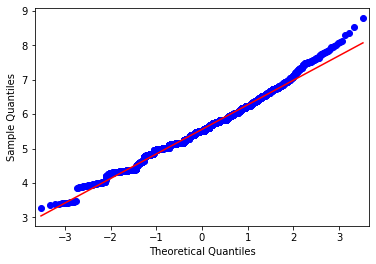

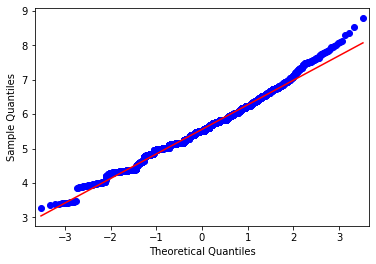

In [101]:
sm.qqplot(time_int['log_time'], line='s')

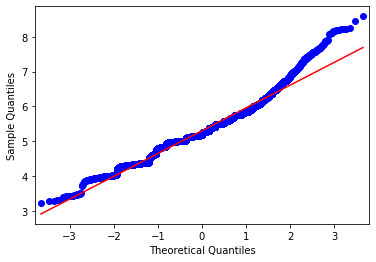

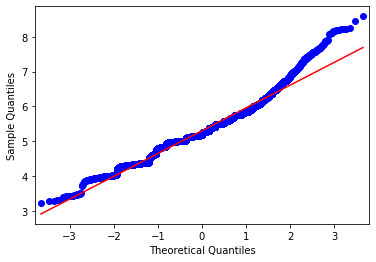

In [102]:
sm.qqplot(time_dom['log_time'], line='s')

#### Тест Колмогорова-Смирнова на нормальное распределение

In [103]:
print(kstest(time_dom['log_time'].to_list(), 'norm'))

KstestResult(statistic=0.9994043676562189, pvalue=0.0)


In [104]:
print(kstest(time_int['log_time'].to_list(), 'norm'))

KstestResult(statistic=0.9994464579360072, pvalue=0.0)


> если p-value<0.05, то распределение не нормальное

#### Дискретный тест К-С на то, что нвблюдения соответсвуют одному распределению

In [105]:
# p-value просто огромное, согласно тесту, наши наблюдения из одного распределения
ks_2samp(time_int['log_time'], time_dom['log_time'])

Ks_2sampResult(statistic=0.17897890700569025, pvalue=1.0)

> <b>Инсайт:</b> за 2018 год обработка деклараций от сабмита работником до оплаты статистически не различается для деклараций на международные командировки и деклараций на внутренние командировки

In [106]:
# DFG репрезентация 

In [107]:
dd_18 = dd_18[dd_18['case:id'].isin(set(time_dom['case:id']))]

In [114]:
dd_18.columns=['id', 'org:resource', 'concept:name', 'time:timestamp_old', 'org:role',
       'case:id', 'case:concept:name', 'case:BudgetNumber',
       'case:DeclarationNumber', 'case:Amount', 'year', 'timezone', 'time:timestamp']

In [116]:
int_18.columns = ['id', 'org:resource', 'concept:name', 'time:timestamp_old', 'org:role',
       'case:Permit travel permit number', 'case:DeclarationNumber',
       'case:Amount', 'case:RequestedAmount', 'case:Permit TaskNumber',
       'case:Permit BudgetNumber', 'case:OriginalAmount',
       'case:Permit ProjectNumber', 'case:concept:name',
       'case:Permit OrganizationalEntity', 'case:travel permit number',
       'case:Permit RequestedBudget', 'case:id', 'case:Permit ID',
       'case:Permit id', 'case:BudgetNumber', 'case:Permit ActivityNumber',
       'case:AdjustedAmount', 'time:timestamp', 'timezone', 'year']

In [117]:
from pm4py.objects.conversion.log import factory as conversion_factory

log_d18 = conversion_factory.apply(dd_18)

In [118]:
from pm4py.algo.discovery.dfg import factory as dfg_factory

dfg_d18 = dfg_factory.apply(log_d18)

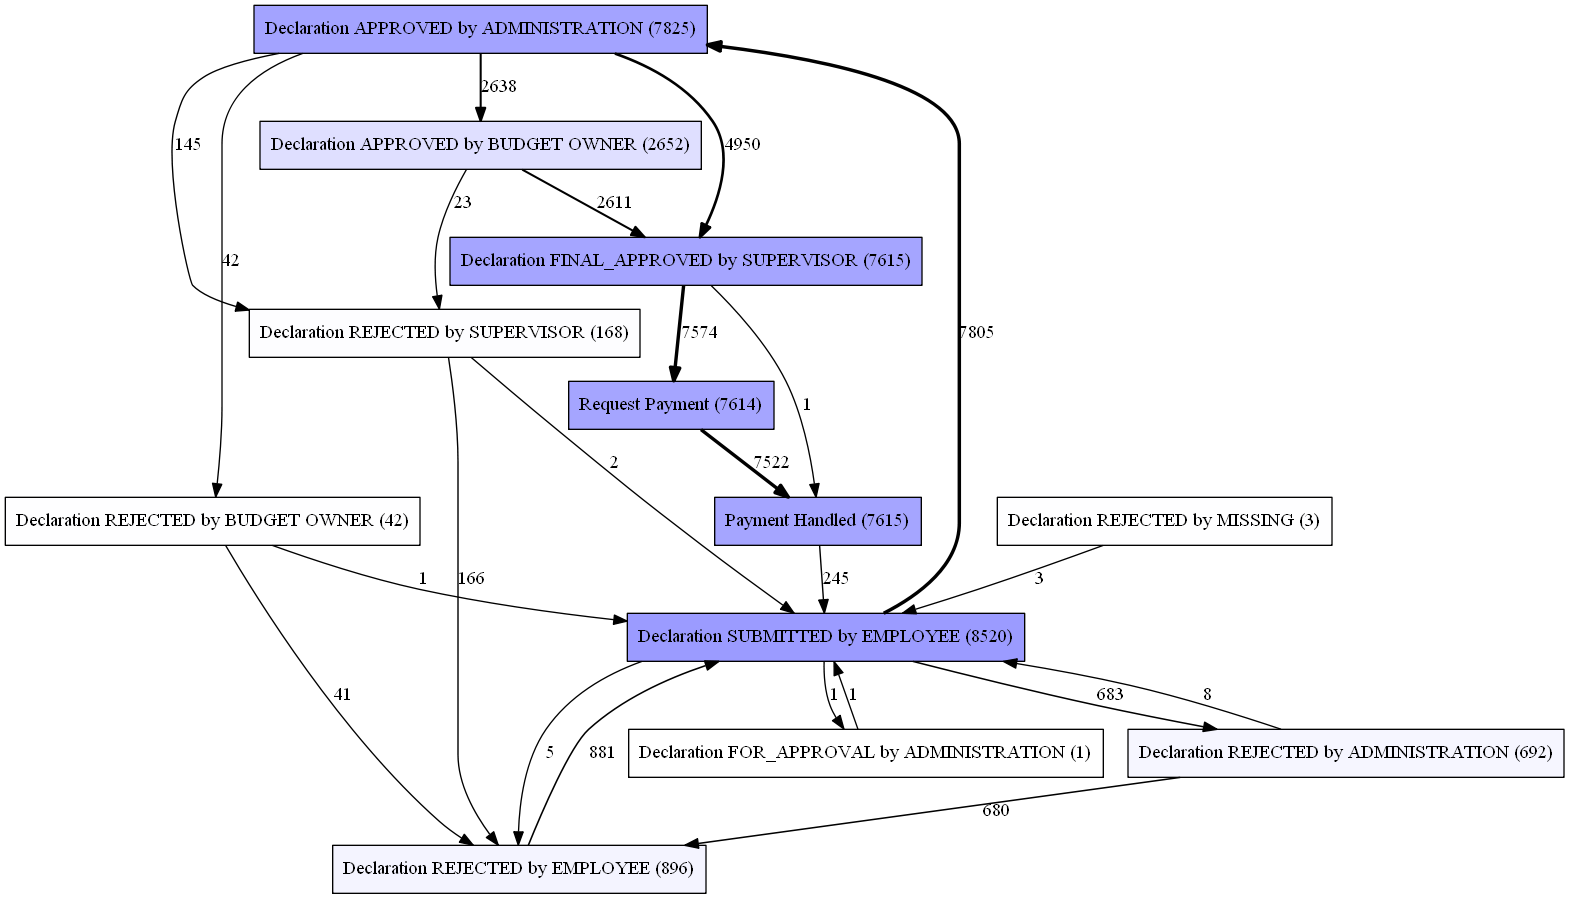

In [119]:
from pm4py.visualization.dfg import factory as dfg_vis_factory

gviz = dfg_vis_factory.apply(dfg_d18, log=log_d18, variant="frequency")
dfg_vis_factory.view(gviz)

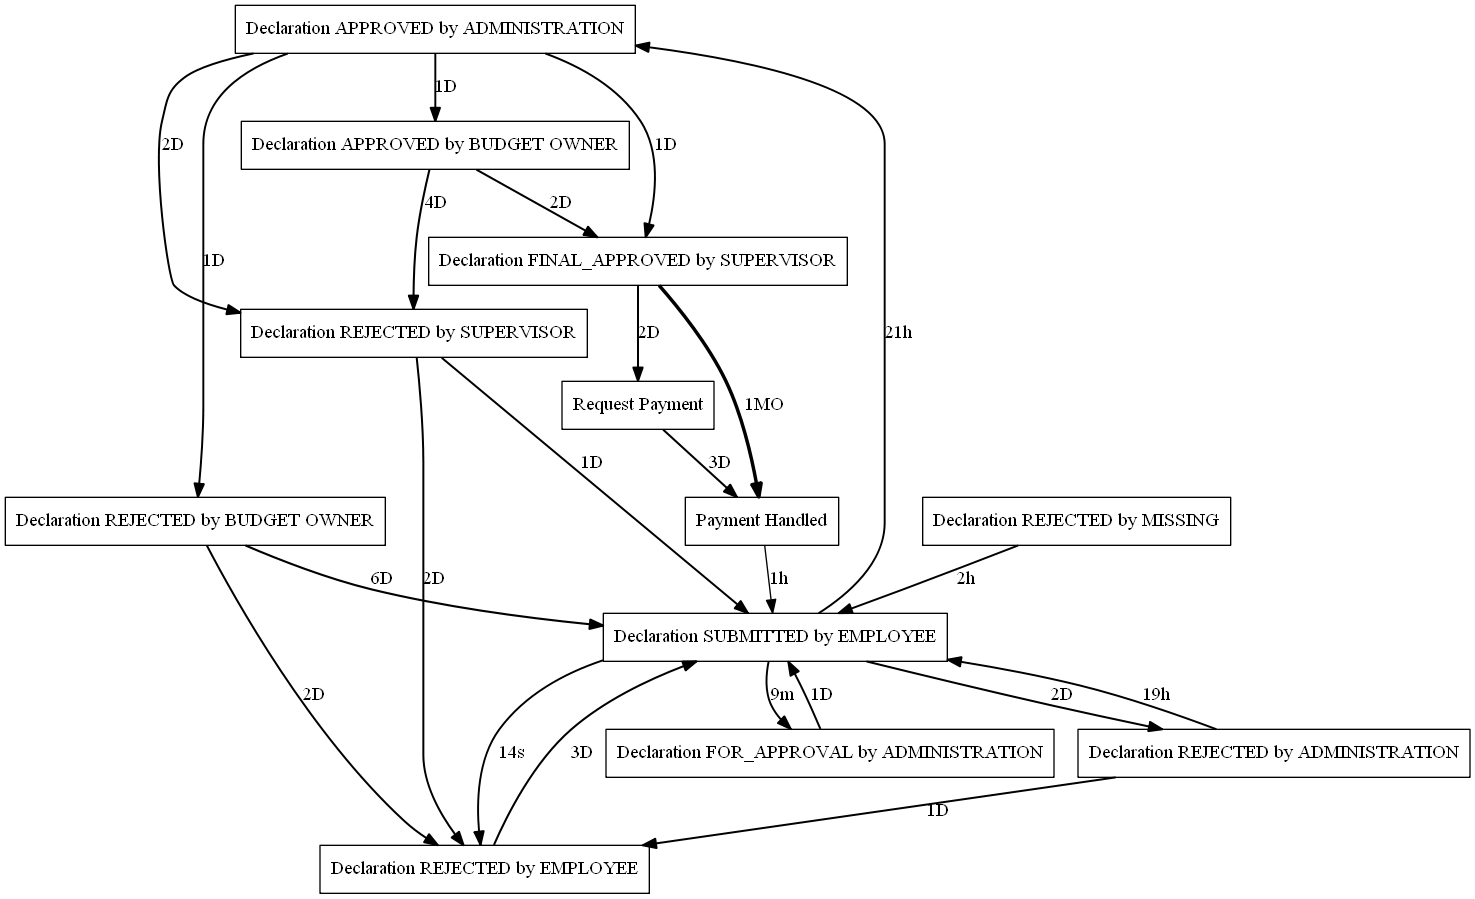

In [121]:
from pm4py.algo.discovery.dfg import factory as dfg_factory
from pm4py.visualization.dfg import factory as dfg_vis_factory

dfg_d18 = dfg_factory.apply(log_d18, variant="performance")
gviz = dfg_vis_factory.apply(dfg_d18, log=log_d18, variant="performance")
dfg_vis_factory.view(gviz)

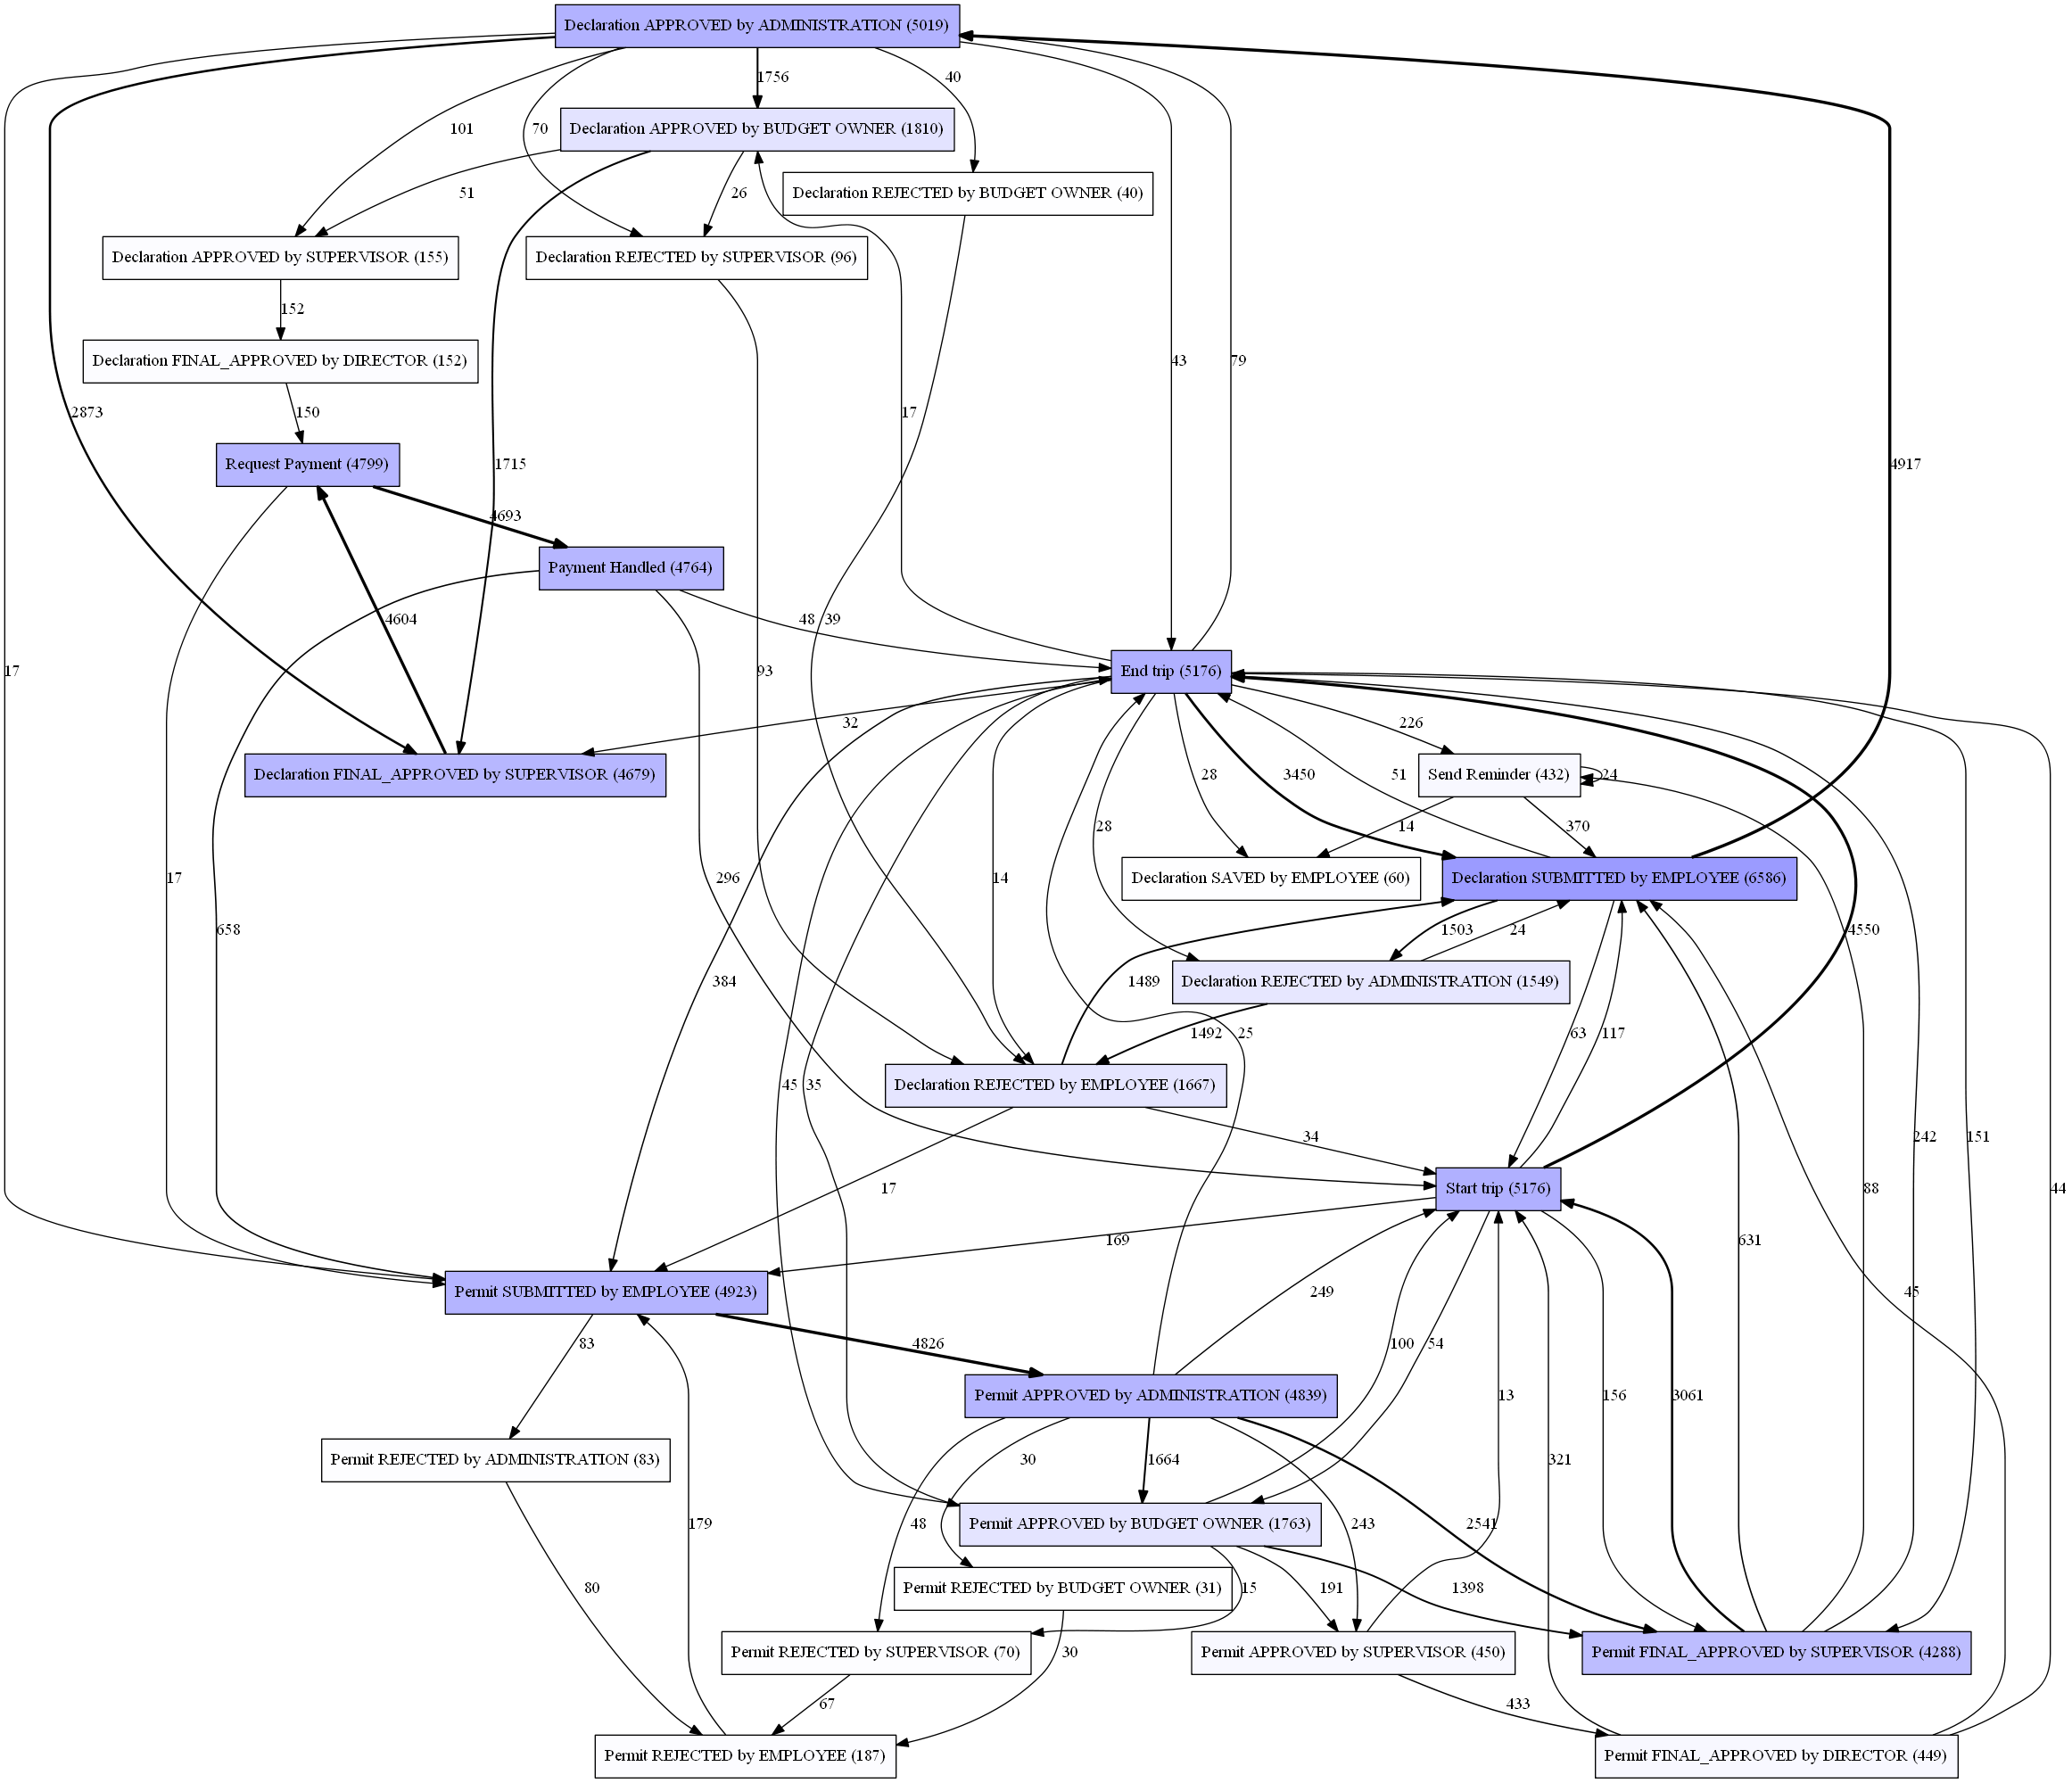

In [122]:
log_int18 = conversion_factory.apply(int_18)
dfg_int18 = dfg_factory.apply(log_int18)
gviz = dfg_vis_factory.apply(dfg_int18, log=log_int18, variant="frequency")
dfg_vis_factory.view(gviz)

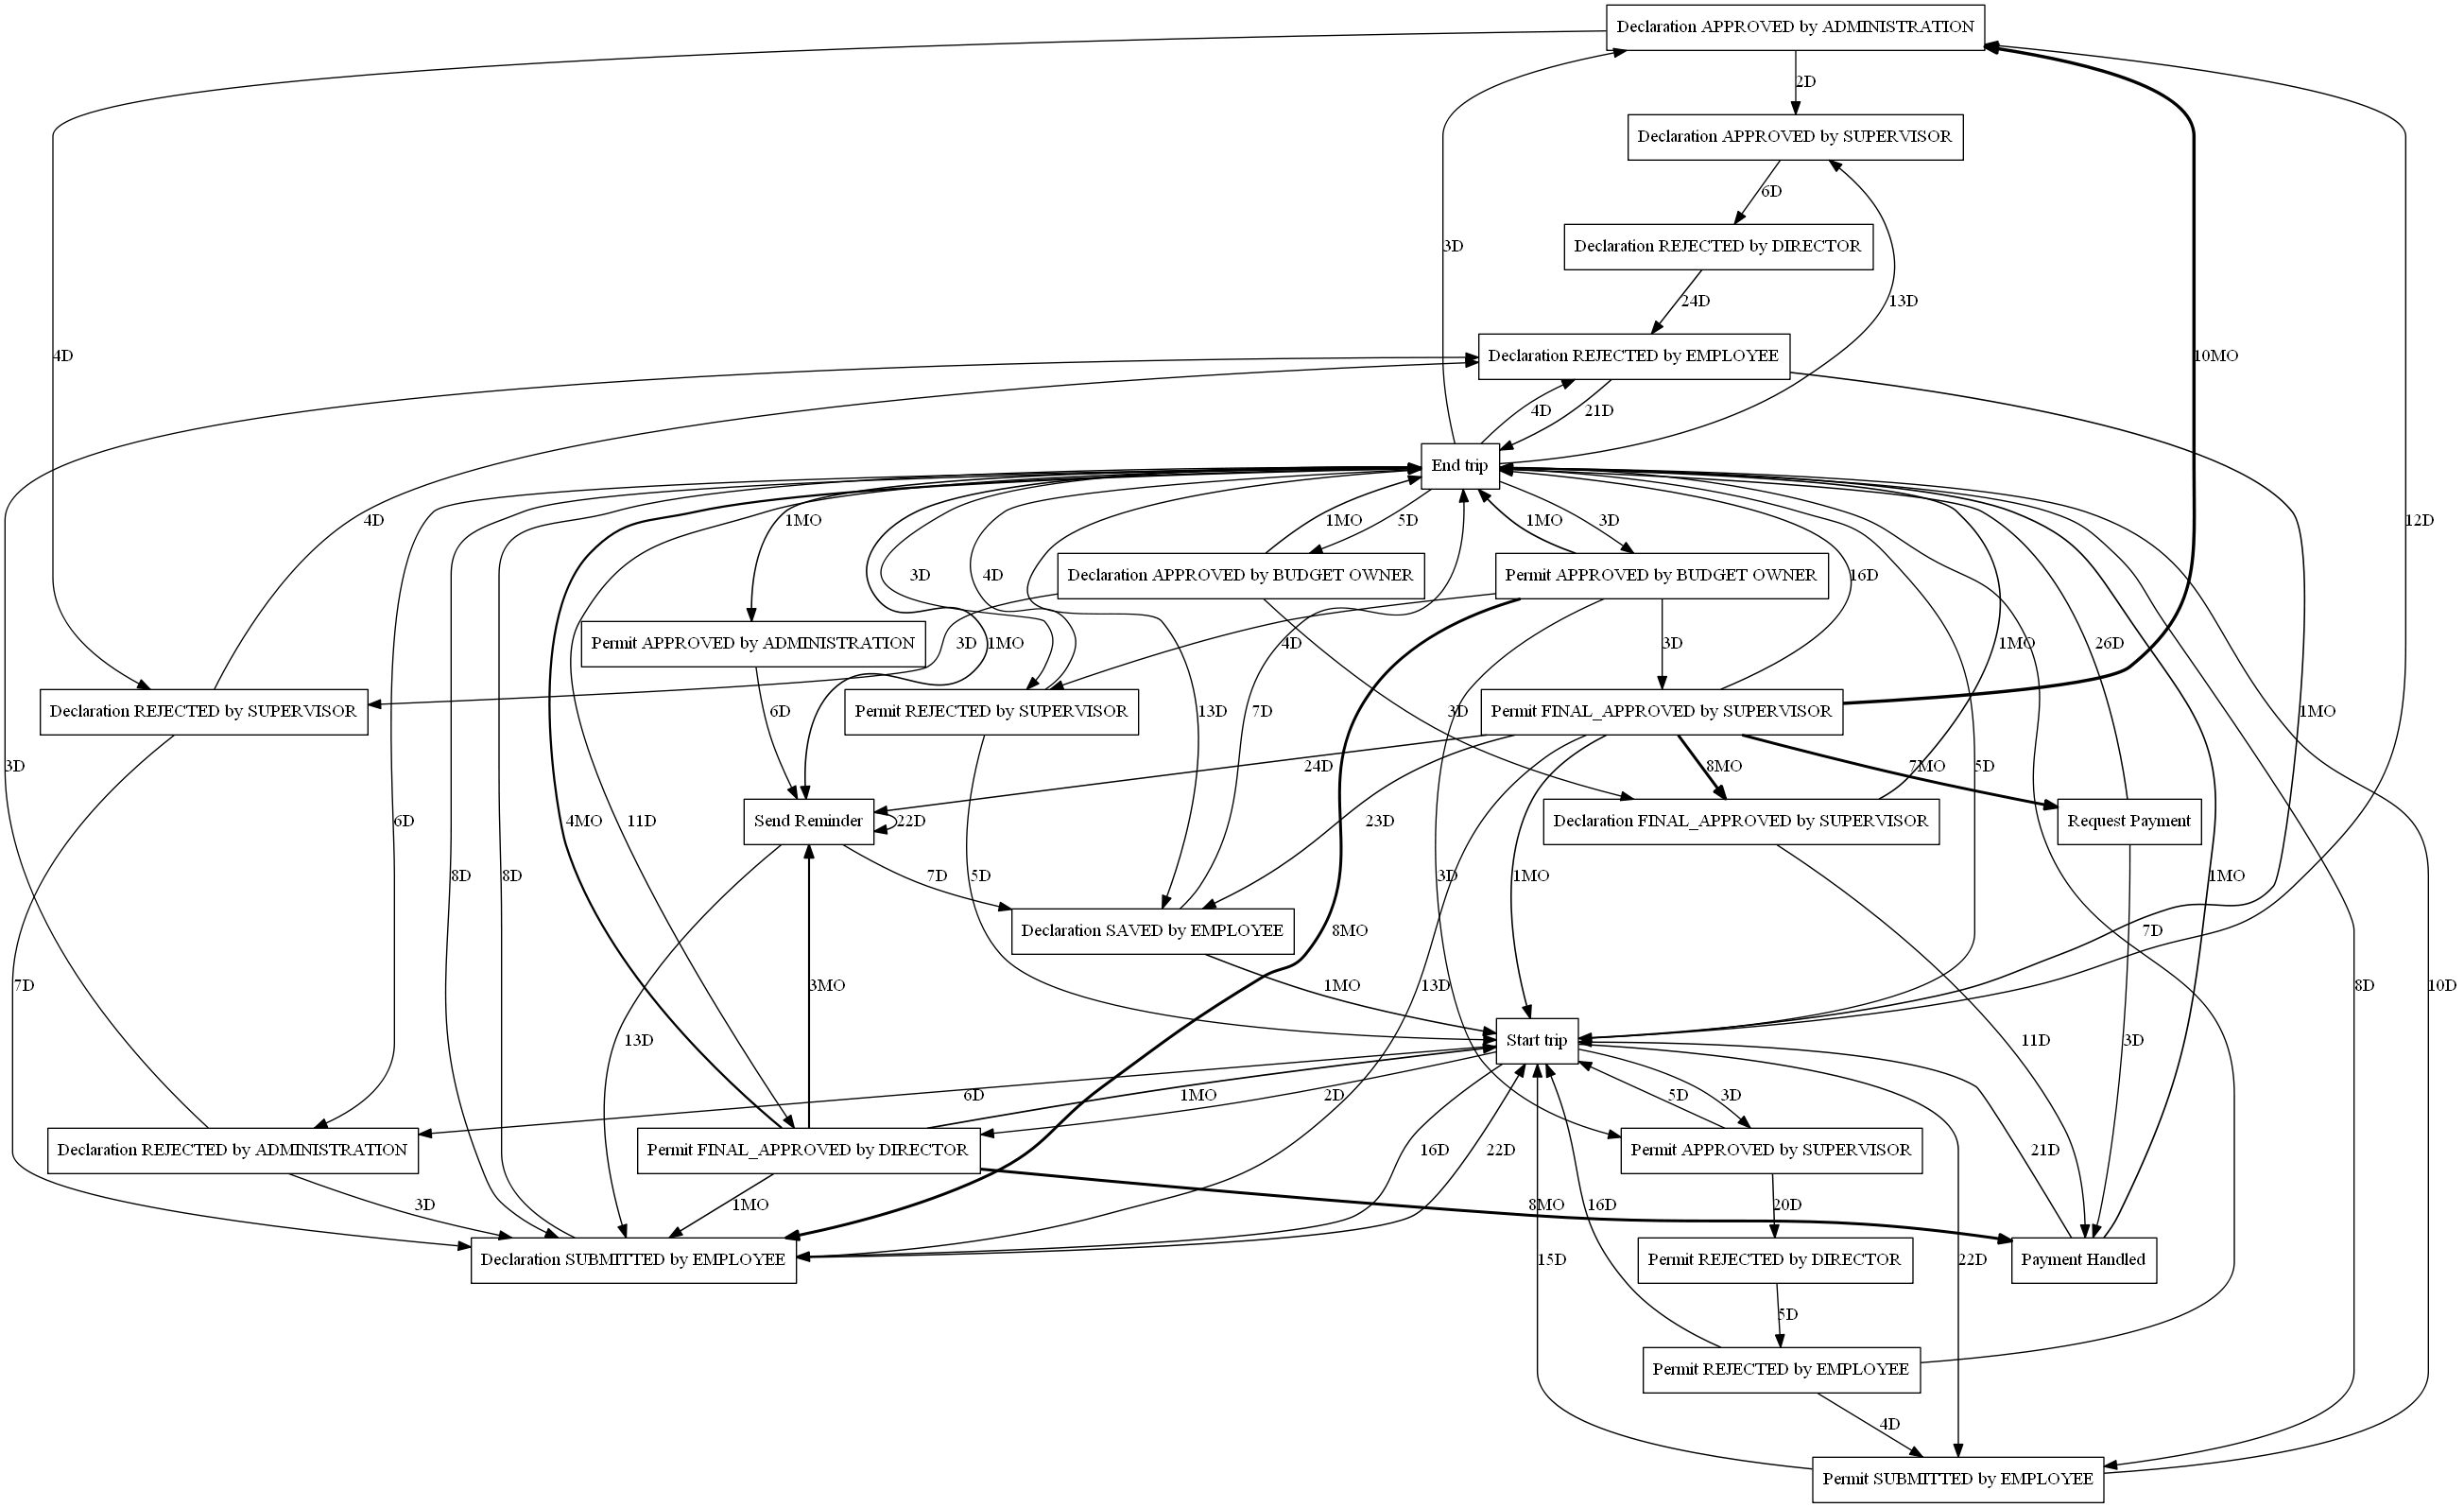

In [123]:
dfg_int18 = dfg_factory.apply(log_int18, variant="performance")
gviz = dfg_vis_factory.apply(dfg_int18, log=log_int18, variant="performance")
dfg_vis_factory.view(gviz)